You don't have to code anything here, just read and follow along.

# Tips and Tricks in Machine Learning

## Instructions
* You may not reproduce this notebook or share them to anyone.

## Import
Import **numpy**, **pandas**, **sklern.preprocessing**, and **matplotlib**.

In [102]:
# added: pip install pandas
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'

## Feature Scaling

Let's generate the data that we will scale. Note that in normalization and standardization, we need to perform it for each feature.

Let's generate random `x` and `y` features for our data.

In [103]:
# comments are added for self ref
np.random.seed(1) # numpy's random number generator seeded by 1 to ensure reproducibility
x = np.arange(0, 6, 0.03) + np.random.randn(200) * 1.3 + 2 # creates an array x by generating values between 0 to 6 with a step of 0.03 and adding random noise scaled by 1.3, and shifting the entire array by 2
y = np.arange(0, 6, 0.03) + np.random.randn(200) * 1.3 + -4 # creates an array y by generating values between 0 to 6 with a step of 0.03 and adding random noise scaled by 1.3, and shifting the entire array by -4

Visualize the data in a 2D graph.

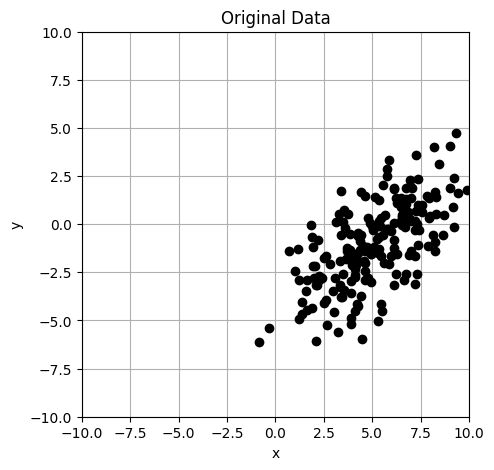

In [104]:
# comments are added for self ref
fig, ax = plt.subplots() # creates a figure and set of subplots. fig is the figure object and ex is the axes object
ax.plot(x, y, 'ko') # plots the datapoints x and y using black circles

plt.xlim(-10, 10) # set x-axis limits to range from -10 to 10
plt.ylim(-10, 10) # set y-axis limits to range from -10 to 10

plt.xlabel('x') # set x-axis label to 'x'
plt.ylabel('y') # set y-axis label to 'y'
plt.title('Original Data')
plt.grid() # adds a grid to the plot for readability

### Normalization

Normalization is used to transform features to a similar scale. This is also called the min-max scaling. Perform normalization on our data by following the formula below.

$$x_{normalization} = \frac{x - min(x)}{max(x) - min(x)}$$


In [105]:
# comments added for self ref
x_normalized_own = (x - np.min(x)) / (np.max(x) - np.min(x))
# normalizes array x to a range between 0 and 1. subtracts minimum value of x from each element and then divides by range (max value minus min value of x)
y_normalized_own = (y - np.min(y)) / (np.max(y) - np.min(y)) # same thing

Visualize the result in a 2D graph.

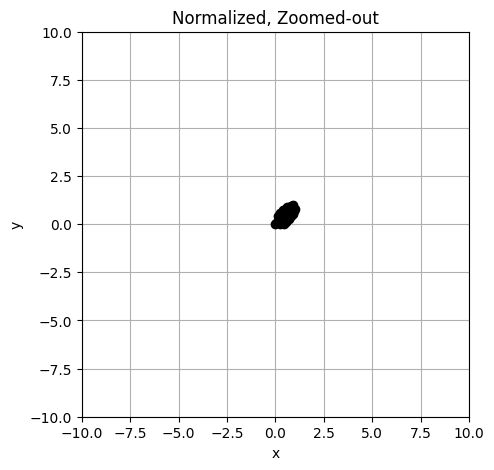

In [106]:
fig, ax = plt.subplots()
ax.plot(x_normalized_own, y_normalized_own, 'ko')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized, Zoomed-out')
plt.grid()

To visualize the data better, let's zoom-in by changing the limits of the x and y axes.

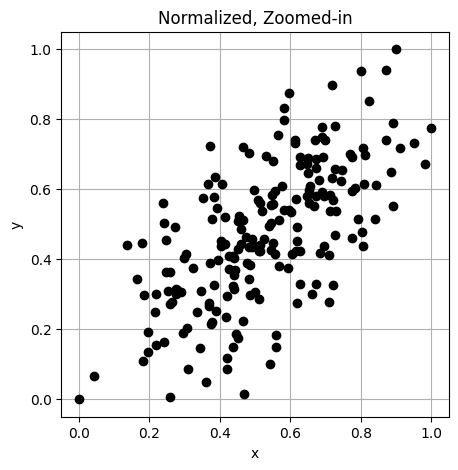

In [107]:
fig, ax = plt.subplots()
ax.plot(x_normalized_own, y_normalized_own, 'ko')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized, Zoomed-in')
plt.grid()

### Normalization using `sklearn.preprocessing.MinMaxScaler`

Let's use `sklearn.preprocessing.MinMaxScaler` to normalize our data. The result should be similar to our own implementation.

Instantiate a `MinMaxScaler` object.

In [108]:
scaler = sklearn.preprocessing.MinMaxScaler()
# comments added for self ref
# creates an instance of the MinMaxScaler from sklearn.processing module
# MinMaxScaler: scales and translates each feature individually : it is in the given range on the training set, e.g. between 0 and 1.

Normalize `x` and `y` values by calling the `fit_transform()` function.

In [109]:
x_normalized_sklearn = scaler.fit_transform(x.reshape(-1,1))
y_normalized_sklearn = scaler.fit_transform(y.reshape(-1,1))

# comments added for self ref
# fit_transform: fits the scaler to the data and then transforms the data according to the scaler; normalizes x using the scaler (MinMaxScaler from sklearn)
# reshape: reshapes array x to have one column and as many rows as needed to accomodate all elements (fit_transform expects a 2D array)

Visualize the result in a 2D graph.

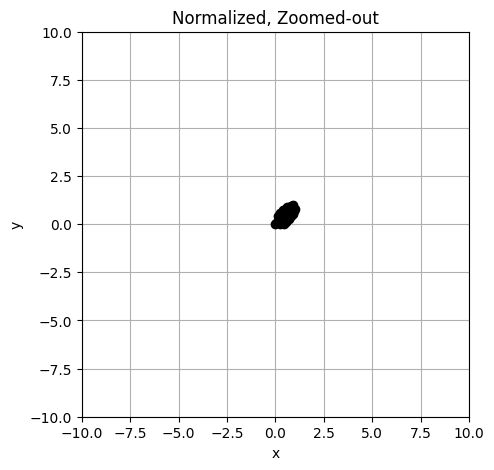

In [110]:
fig, ax = plt.subplots()
ax.plot(x_normalized_sklearn, y_normalized_sklearn, 'ko')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized, Zoomed-out')
plt.grid()

To visualize the data better, let's zoom-in by changing the limits of the x and y axes.

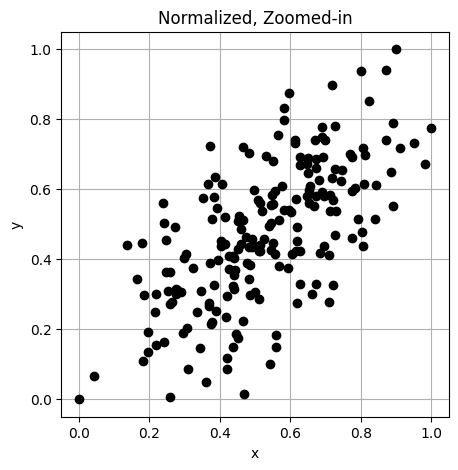

In [111]:
fig, ax = plt.subplots()
ax.plot(x_normalized_sklearn, y_normalized_sklearn, 'ko')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized, Zoomed-in')
plt.grid()

Display the graph of our implementation of normalization and `sklearn.preprocessing.MinMaxScaler()`.

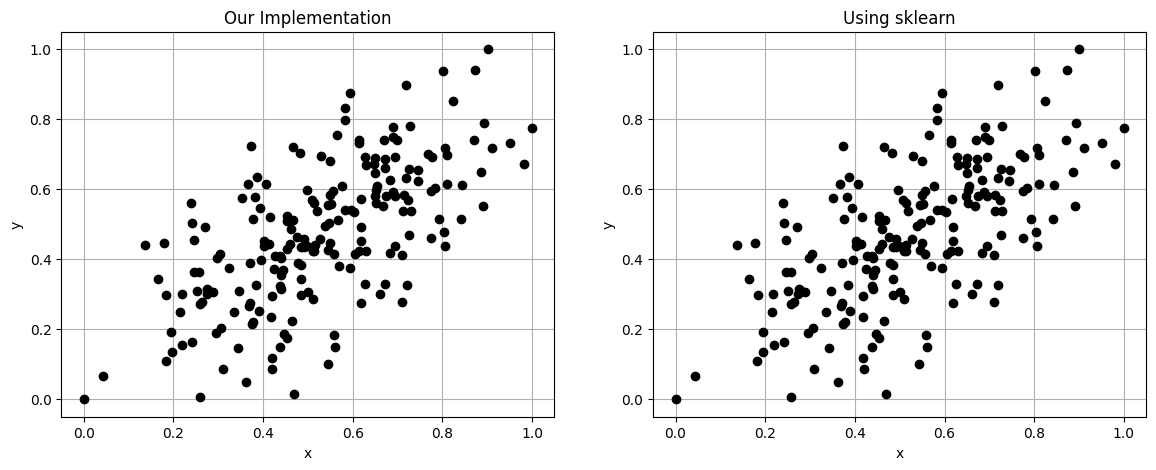

In [112]:
# comments added for self ref
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14, 5)) # cretes a figure and set of subplots with 1 row and 2 cols
# fig is the figure object and ax1 and ax2 are the axes objects
# figure size is set to 14 inches by 5 in

ax1.plot(x_normalized_own, y_normalized_own, 'ko') # plot normalized x and y data using black circles using user's implementation
ax1.set_title('Our Implementation')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()

ax2.plot(x_normalized_sklearn, y_normalized_sklearn, 'ko') # plot normalized x and y data using black circles using sklearn's implementation
ax2.set_title('Using sklearn')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid()

# in our own implementation we manually normalize the data by subtracting the minimum value and dividing by the range (max - min) for each array; have to handle the logic ourselves
# in sklearn's implementation we use the MinMaxScaler class to normalize the data. the fit_transform method fits the scaler to the data then transforms it, ensuring that the data is scaled to the specified range [0, 1]; it's a more automated approach

### Standardization

Standardization transforms features by subtracting the data from the mean and dividing it by the standard deviation. This is often called the z-score. Perform standardization on our data by following the formula below.

$$x_{standardized}=\frac{x-mean(x)}{stddev(x)}$$

In [113]:
x_standardized_own = (x - np.mean(x)) / np.std(x)
y_standardized_own = (y - np.mean(y)) / np.std(y)

# comments added for self ref
# standardizes array x by subtracting the mean and dividing by the standard deviation of x. this transforms x to have a mean of 0 and standard dev of 1
# mean = 0 and std dev = 1 improves convergences in gradient descent, ensures that its standardized and each feature contributes equally to the result, improves interpretability
# standardizing is a common preprocessing step that leads to better performance and more reliable results

Visualize the result in a 2D graph.

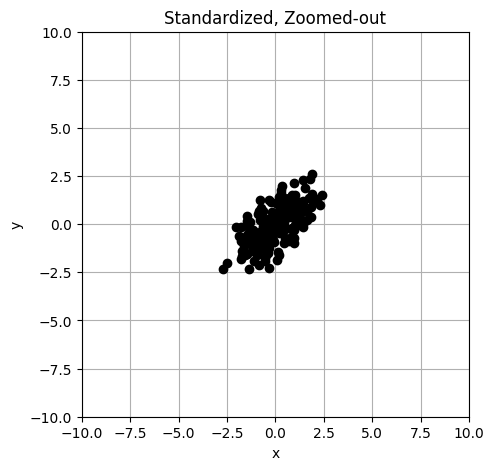

In [114]:
fig, ax = plt.subplots()
ax.plot(x_standardized_own, y_standardized_own, 'ko')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standardized, Zoomed-out')
plt.grid()

To visualize the data better, let's zoom-in by changing the limits of the x and y axes.

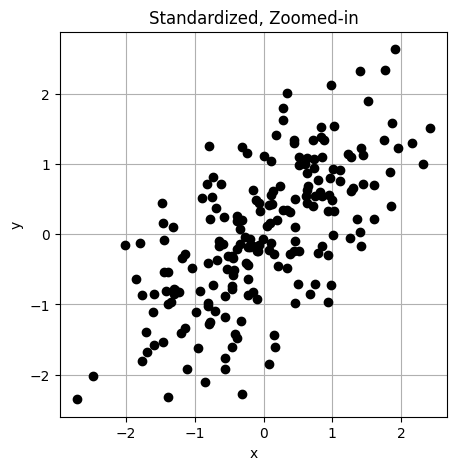

In [115]:
fig, ax = plt.subplots()
ax.plot(x_standardized_own, y_standardized_own, 'ko')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standardized, Zoomed-in')
plt.grid()

Check if the $\mu = 0$ and $\sigma = 1$.

In [116]:
# comments added for self ref
print('Feature x:')
print('Mean:', '{:.2f}'.format(np.mean(x_standardized_own)))
# calculates mean of the standardized x feature using numpy's mean function, formatted to 2 decimal places
print('Standard deviation:', '{:.2f}\n'.format(np.std(x_standardized_own)))
# calculates std deviation of the standardized x feature using numpy's std function, formatted to 2 decimal places

print('Feature y:')
print('Mean:', '{:.2f}'.format(np.mean(y_standardized_own)))
print('Standard deviation:', '{:.2f}\n'.format(np.std(y_standardized_own)))

Feature x:
Mean: 0.00
Standard deviation: 1.00

Feature y:
Mean: 0.00
Standard deviation: 1.00



### Standardization using `sklearn.preprocessing.StandardScaler`

Let's use `sklearn.preprocessing.StandardScaler` to standardize our data. The result should be similar to our own implementation.

Instantiate a `StandardScaler` object.

In [117]:
x_scaler = sklearn.preprocessing.StandardScaler()
y_scaler = sklearn.preprocessing.StandardScaler()

# comments added for ref
# standardscaler: standardizes features by removing the mean and scaling to unit variance
# standardscaler can do the folloiwng:
# fit: computes the mean and std dev for each feature in the training set
# transform: uses the computed mean and std dev to scale the features of the dataset

Standardize `x` and `y` values by calling the `fit_transform()` function.

In [118]:
x_standardized_sklearn = x_scaler.fit_transform(x.reshape(-1, 1))
y_standardized_sklearn = y_scaler.fit_transform(y.reshape(-1, 1))

Visualize the result in a 2D graph.

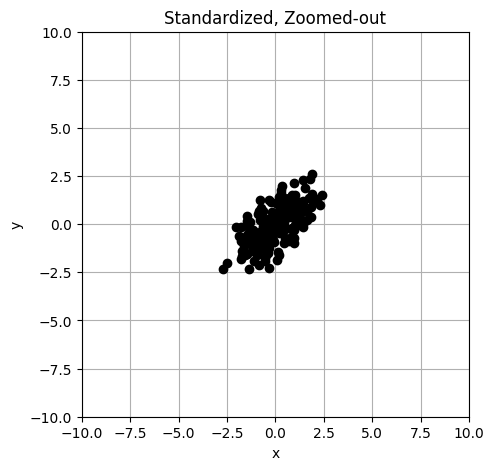

In [119]:
fig, ax = plt.subplots()
ax.plot(x_standardized_sklearn, y_standardized_sklearn, 'ko')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standardized, Zoomed-out')
plt.grid()

To visualize the data better, let's zoom-in by changing the limits of the x and y axes.

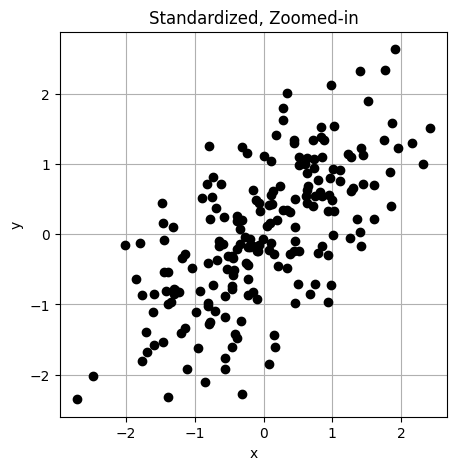

In [120]:
fig, ax = plt.subplots()
ax.plot(x_standardized_sklearn, y_standardized_sklearn, 'ko')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standardized, Zoomed-in')
plt.grid()

Check if the $\mu = 0$ and $\sigma = 1$.

In [121]:
print('Feature x:')
print('Mean:', '{:.2f}'.format(np.mean(x_standardized_sklearn)))
print('Standard deviation:', '{:.2f}\n'.format(np.std(x_standardized_sklearn)))

print('Feature y:')
print('Mean:', '{:.2f}'.format(np.mean(y_standardized_sklearn)))
print('Standard deviation:', '{:.2f}\n'.format(np.std(y_standardized_sklearn)))

Feature x:
Mean: 0.00
Standard deviation: 1.00

Feature y:
Mean: 0.00
Standard deviation: 1.00



Display the graph of our implementation of normalization and `sklearn.preprocessing.StandardScaler()`.

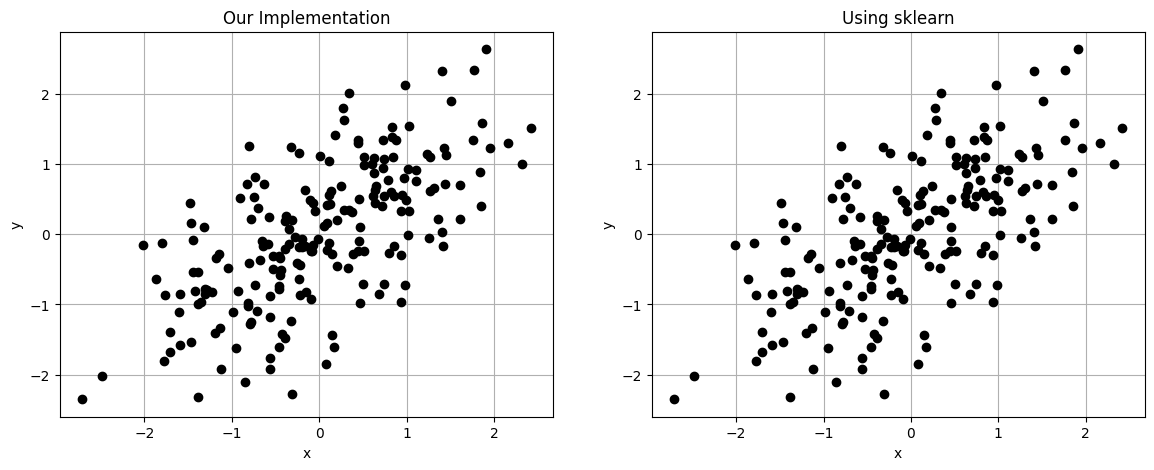

In [122]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))

ax1.plot(x_standardized_own, y_standardized_own, 'ko')
ax1.set_title('Our Implementation')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()

ax2.plot(x_standardized_sklearn, y_standardized_sklearn, 'ko')
ax2.set_title('Using sklearn')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid()

## Feature Encoding

Let's create a synthetic dataset for this section. The dataset is composed of 3 features, namely `size`, `color`, and `type`.

In [123]:
clothes = pd.DataFrame(columns=['size', 'color', 'type'])

clothes['size'] = ['medium', 'large', 'small', 'medium', 'extra large', 
                   'large', 'medium', 'extra small', 'medium', 'large']

clothes['color']= ['red', 'green', 'blue', 'white', 'gray', 'black', 
                   'green', 'blue', 'grey', 'green']

clothes['type'] = ['rayon', 'polyester', 'cotton', 'cotton', 'cotton', 
                   'polyester', 'rayon', 'linen', 'cotton', 'polyester']

clothes

# comments added for self ref
# feature encoding is the process of converting categorical data into a numerical format that can be used by machine learning algorithms
# essential for handling categorical data in machine learning models
# pd.dataframe: creates an empty pandas dataframe with columns 'size', 'color', 'type'
# pd.dataframe: a constructor in pandas lib used to create dataframe objects aka 2d, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns)

,size,color,type
0,medium,red,rayon
1,large,green,polyester
2,small,blue,cotton
3,medium,white,cotton
4,extra large,gray,cotton
5,large,black,polyester
6,medium,green,rayon
7,extra small,blue,linen
8,medium,grey,cotton
9,large,green,polyester


### Label Encoding via `sklearn.preprocessing.LabelEncoder`

Let's use `sklearn.preprocessing.LabelEncoder` to encode our labels with value between `0` to `num_classes - 1`, where `num_classes` equals the number of classes in the dataset.

Instantiate a `LabelEncoder` object.

In [124]:
label_encoder = sklearn.preprocessing.LabelEncoder()

# comments added for self ref
# labelencoder: converts categorical data into numerical data; categorical labels into numerical labels
# assigns a unique integer to each unique category in the data

Fit the `type` feature by calling the `fit()` function of the object.

In [125]:
label_encoder.fit(clothes['type'])

LabelEncoder()

Display the classes.

In [126]:
label_encoder.classes_

# comments added for self ref
# outputs a numpy array containing string elements
# dtype=object: indicates the elements of the array are type object
# strings are python objects

array(['cotton', 'linen', 'polyester', 'rayon'], dtype=object)

Thus, labels will be transformed from string values to their corresponding integer values:
- `cotton` - `0`
- `linen` - `1`
- `polyester` - `2`
- `rayon` - `3`

Transform the `type` feature by calling the `transform()` function of the object. 

In [127]:
clothes['type'] = label_encoder.transform(clothes['type'])
clothes

,size,color,type
0,medium,red,3
1,large,green,2
2,small,blue,0
3,medium,white,0
4,extra large,gray,0
5,large,black,2
6,medium,green,3
7,extra small,blue,1
8,medium,grey,0
9,large,green,2


To reverse the encoding, call the `inverse_transform()` function of the object.

In [128]:
clothes['type'] = label_encoder.inverse_transform(clothes['type'])
clothes

,size,color,type
0,medium,red,rayon
1,large,green,polyester
2,small,blue,cotton
3,medium,white,cotton
4,extra large,gray,cotton
5,large,black,polyester
6,medium,green,rayon
7,extra small,blue,linen
8,medium,grey,cotton
9,large,green,polyester


We set it back to our original categorical data because label encoding is not a suitable preprocessing technique for the `type` column

### One-Hot Encoding via `sklearn.preprocessing.OneHotEncoder`

Let's use `sklearn.preprocessing.OneHotEncoder` to encode our categorical features as a one-hot numeric array.


Instantiate a `OneHotEncoder` object.

In [129]:
one_hot_encoder = sklearn.preprocessing.OneHotEncoder(dtype='int8')

# comments added for self ref
# converts categorical data into a format that can be provided to ML algorithms to do a better job in prediction
# one hot encoding converts each categorical value into a new binary column (0 or 1), each category represented as a binary vector with only one high (1) and the rest are low (0)
# allows categorical data to be used in ML algos that require numerical input
# onehotencoder: automates the process ensuring that the categorical data is transformed into a suitable format for ML models

Fit the `type` feature by calling the `fit()` function of the object.

In [130]:
one_hot_encoder.fit(clothes['type'].values.reshape(-1, 1))

# comments added for self ref
# clothes['type']: returns a 1d array of the type column values
# reshape: reshapes the 1d array into a 2d array with one column and as many rows as needed to accomodate all elements
# onehotencoder expects a 2d array where each row is a sample and each col is a feature

OneHotEncoder(dtype='int8')

Display the categories.

In [131]:
one_hot_encoder.categories_

# comments added for self ref
# "The underscore (_) at the end of one_hot_encoder.categories_ is a naming convention in scikit-learn that indicates an attribute that is created and populated after fitting the encoder. It is used to store the learned categories after the fit method has been called."

[array(['cotton', 'linen', 'polyester', 'rayon'], dtype=object)]

The encoding will then be an array with 4 columns, where the columns represents:
- column 1 - `cotton`
- column 2 - `linen`
- column 3 - `polyester`
- column 4 - `rayon`

If the instance has a value `linen` for the `type` feature, then the one-hot encoding for this instance is `[0, 1, 0, 0]`.

Transform the `type` feature by calling the `transform()` function of the object. 

In [132]:
encoding = one_hot_encoder.transform(clothes['type'].values.reshape(-1, 1)).toarray()
encoding

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=int8)

In [133]:
type_df = pd.DataFrame(encoding, columns=[x for x in one_hot_encoder.categories_] )

clothes = clothes.drop(['type'], axis=1) 
clothes = pd.concat([clothes, type_df], axis=1)
clothes

,size,color,"(cotton,)","(linen,)","(polyester,)","(rayon,)"
0,medium,red,0,0,0,1
1,large,green,0,0,1,0
2,small,blue,1,0,0,0
3,medium,white,1,0,0,0
4,extra large,gray,1,0,0,0
5,large,black,0,0,1,0
6,medium,green,0,0,0,1
7,extra small,blue,0,1,0,0
8,medium,grey,1,0,0,0
9,large,green,0,0,1,0


We'll rename the columns.

In [134]:
clothes.columns

Index(['size', 'color', ('cotton',), ('linen',), ('polyester',), ('rayon',)], dtype='object')

In [135]:
clothes.columns=['size', 'color', 'cotton', 'linen', 'polyester', 'rayon']
clothes

,size,color,cotton,linen,polyester,rayon
0,medium,red,0,0,0,1
1,large,green,0,0,1,0
2,small,blue,1,0,0,0
3,medium,white,1,0,0,0
4,extra large,gray,1,0,0,0
5,large,black,0,0,1,0
6,medium,green,0,0,0,1
7,extra small,blue,0,1,0,0
8,medium,grey,1,0,0,0
9,large,green,0,0,1,0


### Ordinal Encoding

Ordinal encoding is a type of label encoding where there is an order associated with the data. In our example, the `size` feature is ordinal.

Let's create a dictionary that will map string values in the `size` feature to its corresponding integer value according to some order. See list below:
- `extra small` - `0`
- `small` - `1`
- `medium` - `2`
- `large` - `3`
- `extra large` - `4`

In [136]:
clothes_sizes_dict= {
    'extra small' : 0,
    'small' : 1,
    'medium' : 2,
    'large' : 3,
    'extra large' : 4
}

Use the `map()` function to transform the `size` feature to its corresponding ordinal value.

In [137]:
clothes['size'] = clothes['size'].map(clothes_sizes_dict)
clothes

# comments added for self ref
# .map(): transforms values in a series based on a mapping provied by a dictionary, series, or function
# used to replace or transform values in a series according to a specific mapping

,size,color,cotton,linen,polyester,rayon
0,2,red,0,0,0,1
1,3,green,0,0,1,0
2,1,blue,1,0,0,0
3,2,white,1,0,0,0
4,4,gray,1,0,0,0
5,3,black,0,0,1,0
6,2,green,0,0,0,1
7,0,blue,0,1,0,0
8,2,grey,1,0,0,0
9,3,green,0,0,1,0


## Data Augmentation

Data augmentation is helpful especially when training your machine learning model. This makes your model robust to different variations of data.

Import necessary packages.

In [138]:
# added: pip install scikit-image
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

Read the image and display its shape.

In [139]:
image = io.imread('https://upload.wikimedia.org/wikipedia/en/5/5f/Original_Doge_meme.jpg')
print(image.shape)

(263, 350, 3)


Display the image.

C:\Users\gicac\AppData\Local\Temp\ipykernel_11340\2038164919.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)


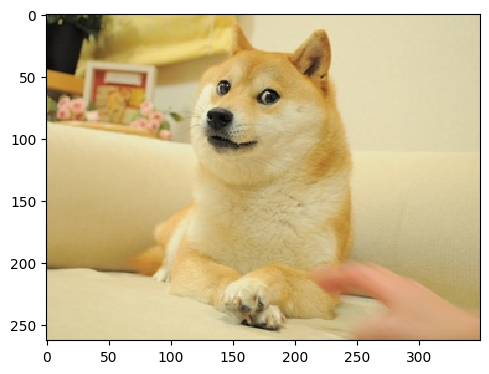

In [140]:
io.imshow(image)

### Rotation

Rotate the image by some degree. In the example below, we rotated the image by 45 degrees.

Text(0.5, 1.0, 'Rotated Image')

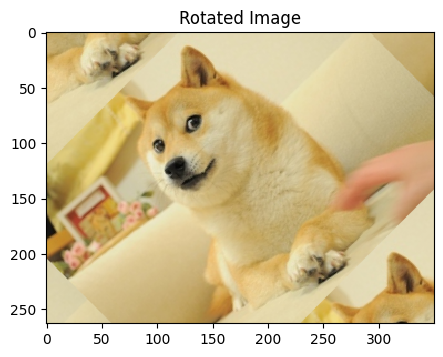

In [141]:
rotated_image = rotate(image, angle=45, mode='wrap')

plt.imshow(rotated_image)
plt.title('Rotated Image')

### Translation

Translate the image by some pixel. In the example below, we moved the image to 50 pixels upwards and 50 pixels to the left.

Text(0.5, 1.0, 'Translated Image')

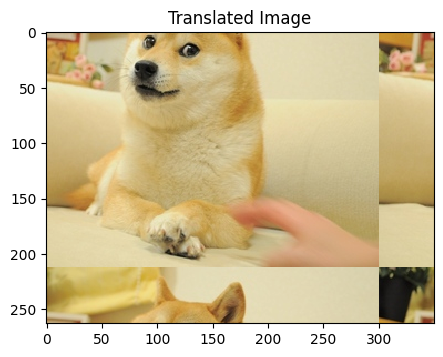

In [142]:
transform = AffineTransform(translation=(50, 50))
translated = warp(image, transform, mode='wrap')

plt.imshow(translated)
plt.title('Translated Image')

### Horizontal Flip

Flip the image with respect to the y-axis.

Text(0.5, 1.0, 'Horizontally-flipped Image')

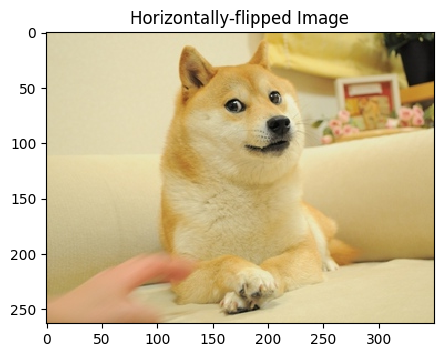

In [143]:
flipped_image = np.fliplr(image)

plt.imshow(flipped_image)
plt.title('Horizontally-flipped Image')

### Vertical Flip

Flip the image with respect to the x-axis.

Text(0.5, 1.0, 'Vertically-flipped Image')

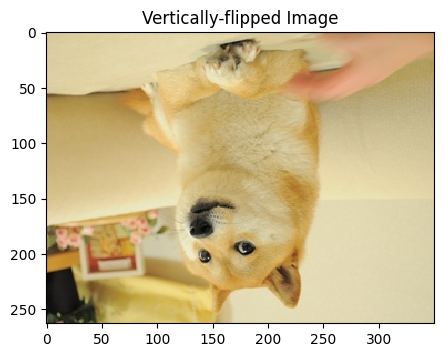

In [144]:
flipped_image = np.flipud(image)

plt.imshow(flipped_image)
plt.title('Vertically-flipped Image')

### Random Noise

Add some random noise to the image.

Text(0.5, 1.0, 'Image with Random Noise')

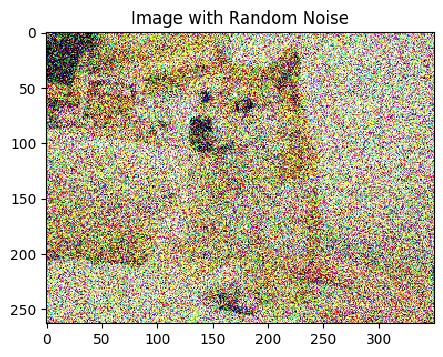

In [145]:
# Standard deviation for noise to be added in the image
sigma = 0.5

# Add random noise to the image
random_noise_image = random_noise(image, var=sigma ** 2)

plt.imshow(random_noise_image)
plt.title('Image with Random Noise')

### Gaussian Blur

Perform gaussian blur on the image.

Text(0.5, 1.0, 'Blurred Image')

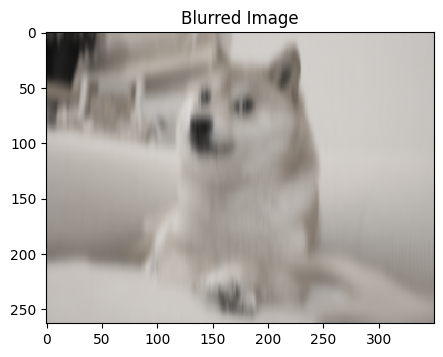

In [146]:
blurred_image = gaussian(image, sigma=5, channel_axis=1)

plt.imshow(blurred_image)
plt.title('Blurred Image')

In the lecture, we explored more types of augmentations. Those augmentations came from the `imgaug` library which we will download by typing the command below in your command prompt/terminal:

`conda install imgaug`

See the documentation [here](https://github.com/aleju/imgaug).

## Training Pipeline

### Dataset

We will use the Census Income dataset as our dataset. Let's load it in a `DataFrame`.

### Pipeline

We will perform the following steps to our data.

- Pre-processing
    - Data Loading
    - Feature Encoding
    - Data Scaling
- Training a linear regression model
- Hyperparameter Tuning: Learning Rate and Regularization

### Data Loading
Let's load `census_income.csv`.

In [147]:
df = pd.read_csv('census_income.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 
              'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
              'capitalgain','capitalloss', 'hoursperweek', 'nativecountry', 
              'label']
df

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


You will normally use EDA and feature selection to select the features for your project. But for the purpose of this notebook, let's just select few feature to apply feature encoding and scaling.

In [148]:
feature_columns = ['age', 'fnlwgt', 'race', 'sex', 'educationnum', 
                   'capitalgain', 'capitalloss', 'hoursperweek', 'label']
df = df[feature_columns]

### One-Hot Encoding
We will apply one hot encoding to `race`.

Instantiate a `OneHotEncoder` object.

In [149]:
one_hot_encoder_race = sklearn.preprocessing.OneHotEncoder(dtype='int8')

Fit the `race` feature by calling the `fit()` function of the object.

In [150]:
one_hot_encoder_race.fit(df['race'].values.reshape(-1, 1))

OneHotEncoder(dtype='int8')

Display the categories.

In [151]:
one_hot_encoder_race.categories_

[array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object)]

The encoding will then be an array with 5 columns, where the columns represents:
- column 1 - ` Amer-Indian-Eskimo`
- column 2 - ` Asian-Pac-Islander`
- column 3 - ` Black`
- column 4 - ` Other`
- column 5 - ` White`

If the instance has a value ` Asian-Pac-Islander` for the `race` feature, then the one-hot encoding for this instance is `[0, 1, 0, 0, 0]`.

Transform the `race` feature by calling the `transform()` function of the object. 

In [152]:
encoding = one_hot_encoder_race.transform(df['race'].values.reshape(-1, 1)).toarray()
encoding

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], shape=(32560, 5), dtype=int8)

In [153]:
race_df = pd.DataFrame(encoding, columns=['race_' + x for x in one_hot_encoder_race.categories_])
race_df

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
32555,0,0,0,0,1
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1


Concatenate the encoding to the original `DataFrame`.

In [154]:
df = pd.concat([df, race_df], axis=1)
df

,age,fnlwgt,race,sex,educationnum,capitalgain,capitalloss,hoursperweek,label,"(race_ Amer-Indian-Eskimo,)","(race_ Asian-Pac-Islander,)","(race_ Black,)","(race_ Other,)","(race_ White,)"
0,50,83311,White,Male,13,0,0,13,<=50K,0,0,0,0,1
1,38,215646,White,Male,9,0,0,40,<=50K,0,0,0,0,1
2,53,234721,Black,Male,7,0,0,40,<=50K,0,0,1,0,0
3,28,338409,Black,Female,13,0,0,40,<=50K,0,0,1,0,0
4,37,284582,White,Female,14,0,0,40,<=50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,White,Female,12,0,0,38,<=50K,0,0,0,0,1
32556,40,154374,White,Male,9,0,0,40,>50K,0,0,0,0,1
32557,58,151910,White,Female,9,0,0,40,<=50K,0,0,0,0,1
32558,22,201490,White,Male,9,0,0,20,<=50K,0,0,0,0,1


### Ordinal Encoding
Let's apply ordinal encoding for the `sex` feature.

Technically, we should apply use one-hot encoding for this, but one-hot encoding is not needed for binary features (i.e., features with only two possible values).

Let's create a dictionary that will map string values in the `sex` feature to its corresponding integer value. See list below:
- ` Male` - `0`
- ` Female` - `1`

In [155]:
sex_mapping_dict = {
    ' Male' : 0,
    ' Female': 1
}

Use the `map()` function to transform the `sex` feature to its corresponding integer value.

In [156]:
df['sex'] = df['sex'].map(sex_mapping_dict)
df 

,age,fnlwgt,race,sex,educationnum,capitalgain,capitalloss,hoursperweek,label,"(race_ Amer-Indian-Eskimo,)","(race_ Asian-Pac-Islander,)","(race_ Black,)","(race_ Other,)","(race_ White,)"
0,50,83311,White,0,13,0,0,13,<=50K,0,0,0,0,1
1,38,215646,White,0,9,0,0,40,<=50K,0,0,0,0,1
2,53,234721,Black,0,7,0,0,40,<=50K,0,0,1,0,0
3,28,338409,Black,1,13,0,0,40,<=50K,0,0,1,0,0
4,37,284582,White,1,14,0,0,40,<=50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,White,1,12,0,0,38,<=50K,0,0,0,0,1
32556,40,154374,White,0,9,0,0,40,>50K,0,0,0,0,1
32557,58,151910,White,1,9,0,0,40,<=50K,0,0,0,0,1
32558,22,201490,White,0,9,0,0,20,<=50K,0,0,0,0,1


Rename columns.

In [157]:
df.columns=['age', 'fnlwgt', 'race', 'sex', 'educationnum', 
            'capitalgain', 'capitalloss', 'hoursperweek', 'label', 
            'race_american_indian_eskimo', 'race_api', 'race_black',
            'race_other', 'race_white']
df

,age,fnlwgt,race,sex,educationnum,capitalgain,capitalloss,hoursperweek,label,race_american_indian_eskimo,race_api,race_black,race_other,race_white
0,50,83311,White,0,13,0,0,13,<=50K,0,0,0,0,1
1,38,215646,White,0,9,0,0,40,<=50K,0,0,0,0,1
2,53,234721,Black,0,7,0,0,40,<=50K,0,0,1,0,0
3,28,338409,Black,1,13,0,0,40,<=50K,0,0,1,0,0
4,37,284582,White,1,14,0,0,40,<=50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,White,1,12,0,0,38,<=50K,0,0,0,0,1
32556,40,154374,White,0,9,0,0,40,>50K,0,0,0,0,1
32557,58,151910,White,1,9,0,0,40,<=50K,0,0,0,0,1
32558,22,201490,White,0,9,0,0,20,<=50K,0,0,0,0,1


Drop the `race` column.

In [158]:
df = df.drop(columns=['race'])

### Train/test split

Let's split the dataset into train, validation, and test sets. 

First, remove the `label` feature from `X` since this is our target feature. We will instead store it in `y`.

In [159]:
X = df.drop(columns=['label']).values
y = df['label'].values

print('X ', X.shape)
print('y ', y.shape)

X  (32560, 12)
y  (32560,)


Import `train_test_split()`.

In [160]:
from sklearn.model_selection import train_test_split

Divide the dataset into train and test sets, where 20% of the data will be placed in the test set.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We will get 10% from the train set to produce a validation set.

In [162]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

Let's display the shape of the train, validation, and test set.

In [163]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_val', X_val.shape)
print('y_val', y_val.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (23443, 12)
y_train (23443,)
X_val (2605, 12)
y_val (2605,)
X_test (6512, 12)
y_test (6512,)


### Simple pipeline

In this section, we will create a simple training pipeline using `sklearn.pipeline.Pipeline` and a classifier `sklearn.tree.DecisionTreeClassifier`.

Import `sklearn.pipeline.Pipeline` and `sklearn.tree.DecisionTreeClassifier`.

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

Instantiate a `Pipeline` object. We will need to pass a list of transforms and a final estimator. Each element in the list is a tuple `(name, transform)`. In the example below, we have 2 elements in the list, where the `name`s of the elements are `scaler` and `classifier`.

In [165]:
pipe = Pipeline([
    ('scaler', sklearn.preprocessing.StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

Execute the pipeline by calling the `fit()` function of the model.

In [166]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

### Predict on train, validation, and test set

Evaluate the model on the train set by calling the `score()` function to get the train accuracy.

In [167]:
pipe.score(X_train, y_train)

0.9988909269291473

Evaluate the model on the validation set by calling the `score()` function to get the validation accuracy.

In [168]:
pipe.score(X_val, y_val)

0.7877159309021113

Evaluate the model on the test set by calling the `score()` function to get the test accuracy.

In [169]:
pipe.score(X_test, y_test)

0.7764127764127764

To know the model hyperparameters used in the pipeline you can do this:

In [170]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__monotonic_cst', 'classifier__random_state', 'classifier__splitter'])

## Simple pipeline with random search of hyperparameters

In this section, we will integrate cross-validation in our pipeline to search the best set of hyperparameters.

Import `sklearn.model_selection.RandomizedSearchCV`.

In [171]:
from sklearn.model_selection import RandomizedSearchCV

Instantiate a `Pipeline` object with an `sklearn.preprocessing.StandardScaler` and a `DecisionTreeClassifier`.

In [172]:
pipe = Pipeline([
    ('scaler', sklearn.preprocessing.StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

Create a list of dictionaries of the different hyperparameters that we want to try. In the example below, we indicated different values for the `DecisionTreeClassifier` `criterion`, `min_impurity_split`, and `max_depth`.

In [173]:
parameters = [
    {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'classifier__max_depth': [5, 10, 20, 30]
    }
]

Instantiate a `RandomizedSearchCV` object. Pass the `Pipeline` object and the varible `parameters`. This performs randomized search on the different values of the hyperparameters that we listed in the variable `parameters`.

In [174]:
rscv = RandomizedSearchCV(pipe, parameters, cv=5, verbose=1)

Execute the randomized search by calling the `fit()` function of the object.

In [175]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              DecisionTreeClassifier())]),
                   param_distributions=[{'classifier__criterion': ['gini',
                                                                   'entropy'],
                                         'classifier__max_depth': [5, 10, 20,
                                                                   30],
                                         'classifier__min_impurity_decrease': [0.001,
                                                                               0.01,
                                                                               0.05,
                                                                               0.1,
                                                                               0.3,
                                                                               0.5]}],
                   verbose=1)

By default, RandomizedSearchCV will act as the model with the best found parameters.

Get the prediction of the model on the training set.

In [176]:
predictions = rscv.predict(X_train)
predictions

array([' <=50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      shape=(23443,), dtype=object)

Compute for the accuracy of the model on the train set.

In [177]:
np.mean(predictions == y_train)

np.float64(0.8355585889178007)

Get the prediction of the model on the training set.

In [178]:
predictions = rscv.predict(X_val)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      shape=(2605,), dtype=object)

Compute for the accuracy of the model on the train set.

In [179]:
np.mean(predictions == y_val)

np.float64(0.8345489443378119)

Get the prediction of the model on the test set.

In [180]:
predictions = rscv.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      shape=(6512,), dtype=object)

Compute for the accuracy of the model on the test set.

In [181]:
np.mean(predictions == y_test)

np.float64(0.8358415233415234)

Here are the best parameters found:

In [182]:
rscv.best_params_

{'classifier__min_impurity_decrease': 0.001,
 'classifier__max_depth': 10,
 'classifier__criterion': 'gini'}

## Pipeline with different classifiers + random search

`sklearn.pipeline.Pipeline` cannot handle multiple claassifiers by default, but we can make a class that switches the classifier for us.

source: https://stackoverflow.com/questions/48507651/multiple-classification-models-in-a-scikit-pipeline-python

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator

class ClassifierSwitcher(BaseEstimator):

    def __init__(self, estimator=RandomForestClassifier()):
        '''
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        '''

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

Import `sklearn.ensemble.AdaBoostClassifier`.

In [184]:
from sklearn.ensemble import AdaBoostClassifier

Here, we have a pipeline that experiments between a random forest classifier and an adaboost classifier, and we also list the hyperparameters we want it to tweak in random search.

In [185]:
pipeline = Pipeline([
    ('classifier', ClassifierSwitcher()),
])

parameters = [
    {
        'classifier__estimator': [RandomForestClassifier()], # SVM if hinge loss / logreg if log loss
        'classifier__estimator__criterion': ['gini', 'entropy'],
        'classifier__estimator__min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'classifier__estimator__max_depth': [5, 10, 20, 30]
    },
    {
        'classifier__estimator': [AdaBoostClassifier()],
        'classifier__estimator__n_estimators': [100, 150, 200, 250, 300],
        'classifier__estimator__learning_rate': [0.001, 0.01, 0.1, 1]
    },
]

Instantiate a `RandomizedSearchCV` object. Pass the `Pipeline` object and the varible `parameters`.

In [186]:
rscv = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=12, verbose=3)

Execute the randomized search by calling the `fit()` function of the object.

In [187]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('classifier',
                                              ClassifierSwitcher())]),
                   n_jobs=12,
                   param_distributions=[{'classifier__estimator': [RandomForestClassifier()],
                                         'classifier__estimator__criterion': ['gini',
                                                                              'entropy'],
                                         'classifier__estimator__max_depth': [5,
                                                                              10,
                                                                              20,
                                                                              30],
                                         'classifier__estimator__min_impurity_decrease': [0.001,
                                                                                          0.01,
                                                                                          0.05,
                                                                                          0.1,
                                                                                          0.3,
                                                                                          0.5]},
                                        {'classifier__estimator': [AdaBoostClassifier()],
                                         'classifier__estimator__learning_rate': [0.001,
                                                                                  0.01,
                                                                                  0.1,
                                                                                  1],
                                         'classifier__estimator__n_estimators': [100,
                                                                                 150,
                                                                                 200,
                                                                                 250,
                                                                                 300]}],
                   verbose=3)

Compute for the accuracy of the model on the train set.

In [188]:
rscv.score(X_train, y_train)

c:\Users\gicac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.8413172375549205

Compute for the accuracy of the model on the validation set.

In [189]:
rscv.score(X_val, y_val)

c:\Users\gicac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.8433781190019194

Compute for the accuracy of the model on the test set.

In [190]:
rscv.score(X_test, y_test)

c:\Users\gicac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.8447481572481572

Here are the best parameters found:

In [191]:
rscv.best_params_

{'classifier__estimator__n_estimators': 300,
 'classifier__estimator__learning_rate': 1,
 'classifier__estimator': AdaBoostClassifier()}

Hope this will help you with your project.

## <center>fin</center>